In [ ]:
# Problem 3: In this section, decission tree Classification is presented for datasets of drugs
# https://drive.google.com/file/d/1DwNyKLj3LMI0Vx4p0WM0v8qqZfpBRs_u/view?usp=sharing
# Problem 3.1
!pip install --upgrade --no-cache-dir gdown
!gdown 1DwNyKLj3LMI0Vx4p0WM0v8qqZfpBRs_u

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1DwNyKLj3LMI0Vx4p0WM0v8qqZfpBRs_u
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 22.0MB/s]


## **🔸 Decision Tree (From sklearn)** 🌳

In [ ]:
 #Importing the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [ ]:
# reading the data using pandas dataframe:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = my_data['Drug']
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
# Convert categorical dataset to numeirical values datasets
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the dataset into training and testing set
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=16)
print("X Train size: ",X_trainset.shape)
print("Y Train size: ",y_trainset.shape)

X Train size:  (160, 5)
Y Train size:  (160,)


In [ ]:
model_DT = tree.DecisionTreeClassifier(max_depth = 4, random_state=16, ccp_alpha=0.1, criterion='log_loss')
#DecisionTreeClassifier(max_depth = 3, random_state=16, ccp_alpha=0.01, criterion='gini') #, criterion='entropy',log_loss,gini
model_DT

DecisionTreeClassifier(ccp_alpha=0.1, criterion='log_loss', max_depth=4,
                       random_state=16)

In [ ]:
#predictions on the testing dataset and stored it into a variable called predTree.
model_DT.fit(X_trainset,y_trainset)
ypred_DT = model_DT.predict(X_testset)
print (ypred_DT [0:5])
print (y_testset [0:5])

['drugY' 'drugY' 'drugA' 'drugY' 'drugX']
154    drugY
0      drugY
174    drugA
59     drugY
112    drugX
Name: Drug, dtype: object


In [ ]:
# Evaluation accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, ypred_DT))

DecisionTrees's Accuracy:  0.975


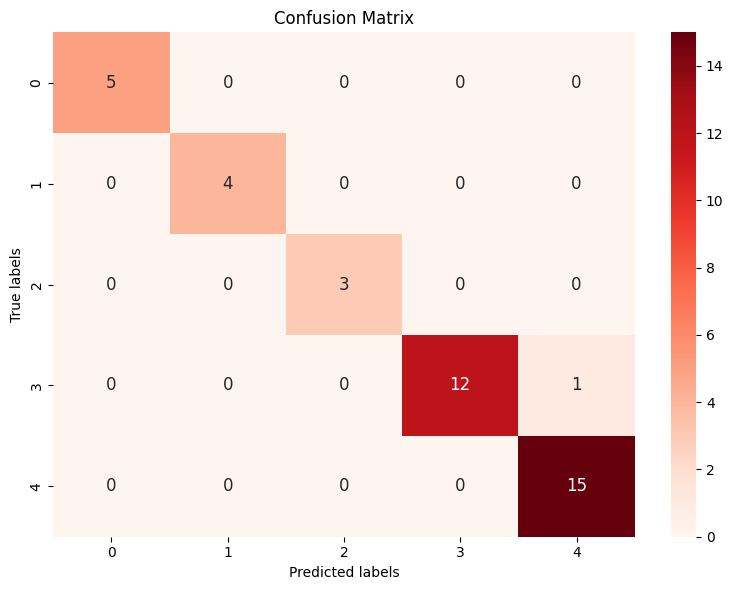

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.92      0.96        13
       drugY       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

test_accuracy: 0.975


In [ ]:
 # Making predictions on the test set problem 3.2
y_pred_DT = model_DT.predict(X_testset )
accuracy_mlp = model_DT.score(X_testset ,y_testset )
# Loss = model_DT.loss_curve_
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_testset, y_pred_DT)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_testset)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_testset, y_pred_DT))
print("test_accuracy:", accuracy_mlp)

Text(0, 0.5, 'Type of drugs')

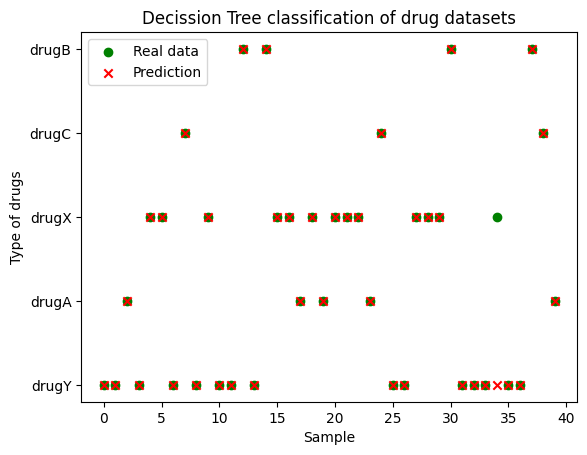

In [ ]:
plt.figure( )
plt.scatter(range(len(y_testset)), y_testset, c='g', marker='o',label = 'Real data')
plt.scatter(range(len(ypred_DT)), ypred_DT, c='r', marker='x',label = 'Prediction')
plt.legend()
plt.xlabel('Sample')
plt.title('Decission Tree classification of drug datasets')
plt.ylabel('Type of drugs')

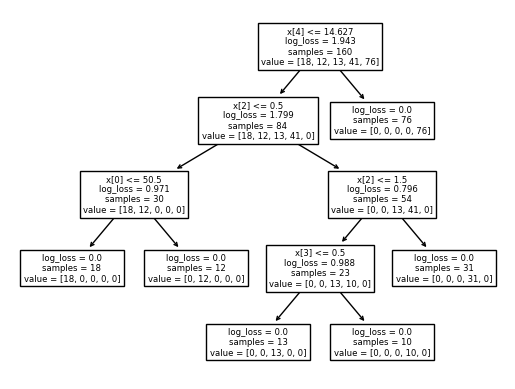

In [ ]:
tree.plot_tree(model_DT);

### Visualization

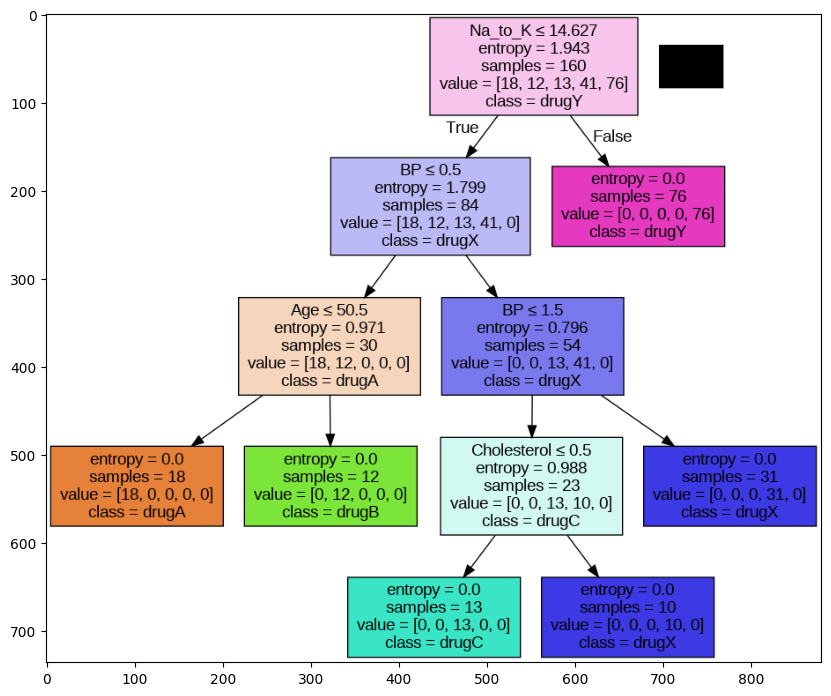

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(model_DT,feature_names=featureNames,
  out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img)

In [ ]:
# model_DT.tree_.node_count
# model_DT.tree_.n_leaves
# model_DT.tree_.n_node_samples
# model_DT.tree_.children_left
# model_DT.tree_.children_right
# model_DT.tree_.value
# model_DT.tree_.feature
model_DT.tree_.threshold
# model_DT.tree_.impurity
# model_DT.tree_.max_depth

array([14.62700033,  0.5       , 50.5       , -2.        , -2.        ,
        1.5       ,  0.5       , -2.        , -2.        , -2.        ,
       -2.        ])

In [ ]:
r = tree.export_text(model_DT)
print(r)

|--- feature_4 <= 14.63
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.63
|   |--- class: drugY



In [ ]:
# Problem 3.4 Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
Model_RFC = RandomForestClassifier(n_estimators=20,max_depth=4,min_samples_split=3,ccp_alpha=0.001, criterion='gini', random_state=16)
Model_RFC.fit(X_trainset, y_trainset)
ypred_RFC = Model_RFC.predict(X_testset)
print("RandomForestClassifier's Accuracy: ", metrics.accuracy_score(y_testset, ypred_RFC))

RandomForestClassifier's Accuracy:  0.95


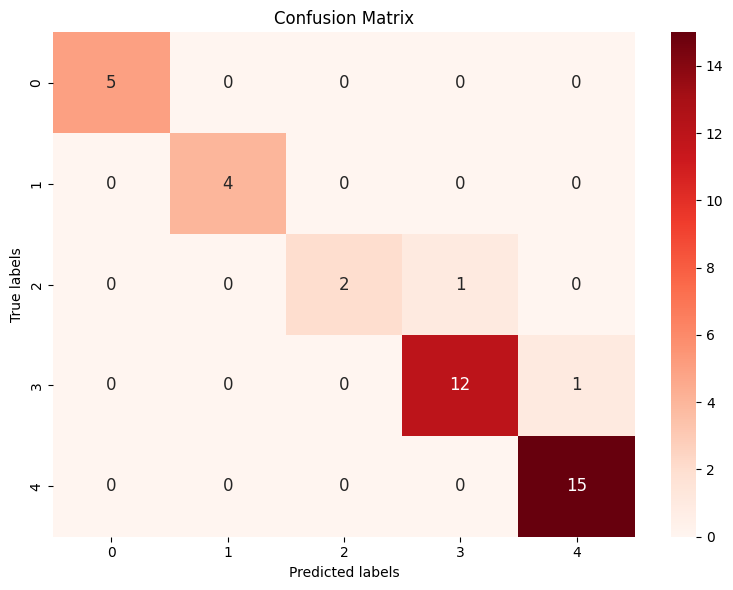

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.67      0.80         3
       drugX       0.92      0.92      0.92        13
       drugY       0.94      1.00      0.97        15

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40

test_accuracy: 0.95


In [ ]:
 # Making predictions on the test set problem 3.2
y_pred_RFC = Model_RFC.predict(X_testset )
accuracy_RFC = Model_RFC.score(X_testset ,y_testset )
# Loss = model_DT.loss_curve_
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_testset, y_pred_RFC)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_testset)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_testset, y_pred_RFC))
print("test_accuracy:", accuracy_RFC)

Text(0, 0.5, 'Type of drugs')

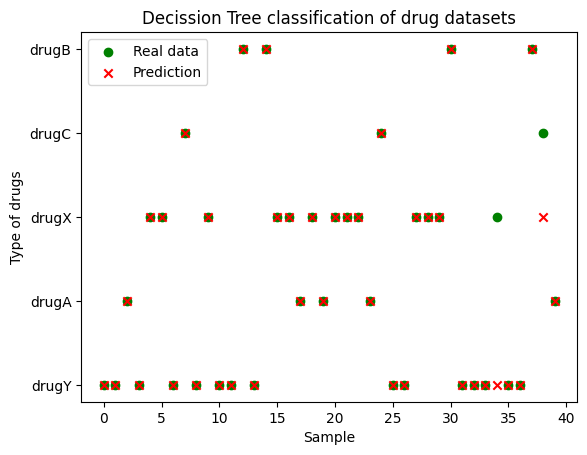

In [ ]:
plt.figure( )
plt.scatter(range(len(y_testset)), y_testset, c='g', marker='o',label = 'Real data')
plt.scatter(range(len(y_pred_RFC)), y_pred_RFC, c='r', marker='x',label = 'Prediction')
plt.legend()
plt.xlabel('Sample')
plt.title('Decission Tree classification of drug datasets')
plt.ylabel('Type of drugs')